In [1]:
import sys
sys.path.append('../src')

import importlib
import dyn_accept_loop as dal
importlib.reload(dal)
import reject_inference as rinf
importlib.reload(rinf)

import matplotlib.pyplot as plt

import lightgbm as lgbm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import torch

## Test importable Dynamic Acceptance Loop

C:\Users\haase.PAPMEIER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Itteration: 0) Accepted: 729 | Denied: 1701 - New train set size: (6729, 115)
Itteration: 1) Accepted: 729 | Denied: 1701 - New train set size: (7458, 115)
Itteration: 2) Accepted: 729 | Denied: 1701 - New train set size: (8187, 115)
Itteration: 3) Accepted: 729 | Denied: 1701 - New train set size: (8916, 115)
Itteration: 4) Accepted: 729 | Denied: 1701 - New train set size: (9645, 115)
Itteration: 5) Accepted: 729 | Denied: 1701 - New train set size: (10374, 115)
Itteration: 6) Accepted: 729 | Denied: 1701 - New train set size: (11103, 115)
Itteration: 7) Accepted: 729 | Denied: 1701 - New train set size: (11832, 115)
Itteration: 8) Accepted: 729 | Denied: 1701 - New train set size: (12561, 115)
Itteration: 9) Accepted: 729 | Denied: 1701 - New train set size: (13290, 115)
Itteration: 10) Accepted: 729 | Denied: 1701 - New train set size: (14019, 115)
Itteration: 11) Accepted: 729 | Denied: 1701 - New train set size: (14748, 115)
Itteration: 12) Accepted: 729 | Denied: 1701 - New trai

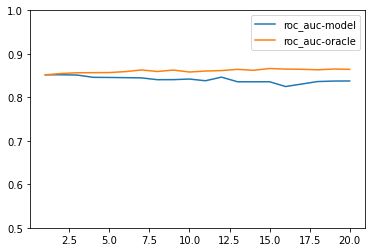

In [2]:
n_years = 20

sim = dal.Simulate_acceptance_loop("paipaidai.csv", LogisticRegression(max_iter=400), 0.1, 0.1, n_years, enc_features=False, rej_inf=rinf.EMsemisupervised)
results_generator = sim.run()

metrics = None
for iteration in results_generator:
    print(f'Itteration: {iteration[0]}) Accepted: {iteration[1].count(True)} | Denied: {iteration[1].count(False)} - New train set size: {iteration[2]}')
    metrics = iteration[3]
    
x = range(1, n_years + 1)
plt.plot(x, metrics["model"]["holdout"]['roc_auc'], label = 'roc_auc-model')
plt.plot(x, metrics["oracle"]["holdout"]['roc_auc'], label = 'roc_auc-oracle')
#plt.plot(x, results["holdout"]['precision'], label = 'precision')
#plt.plot(x, results["holdout"]['f1'], label = 'f1')
#plt.plot(x, results["holdout"]['accuracy'], label = 'accuracy')
plt.legend()
plt.ylim([0.5, 1.0])
plt.show()

## Test importable Autoencoder

In [3]:
import autoencoder as aenc
import importlib
importlib.reload(aenc)

<module 'autoencoder' from 'c:\\Projects\\Information-Systems-Seminar\\reject-infer-autoencoder\\notebooks\\../src\\autoencoder.py'>

Autoencoder(
  (enc): ModuleList(
    (0): Linear(in_features=68, out_features=35, bias=True)
    (1): Linear(in_features=35, out_features=2, bias=True)
  )
  (dec): ModuleList(
    (0): Linear(in_features=2, out_features=35, bias=True)
    (1): Linear(in_features=35, out_features=68, bias=True)
  )
)
Epoch 1 of 20, Train Loss: 0.913
Epoch 2 of 20, Train Loss: 0.837
Epoch 3 of 20, Train Loss: 0.822
Epoch 4 of 20, Train Loss: 0.809
Epoch 5 of 20, Train Loss: 0.801
Epoch 6 of 20, Train Loss: 0.795
Epoch 7 of 20, Train Loss: 0.790
Epoch 8 of 20, Train Loss: 0.786
Epoch 9 of 20, Train Loss: 0.783
Epoch 10 of 20, Train Loss: 0.780
Epoch 11 of 20, Train Loss: 0.779
Epoch 12 of 20, Train Loss: 0.777
Epoch 13 of 20, Train Loss: 0.775
Epoch 14 of 20, Train Loss: 0.774
Epoch 15 of 20, Train Loss: 0.772
Epoch 16 of 20, Train Loss: 0.771
Epoch 17 of 20, Train Loss: 0.769
Epoch 18 of 20, Train Loss: 0.766
Epoch 19 of 20, Train Loss: 0.765
Epoch 20 of 20, Train Loss: 0.764


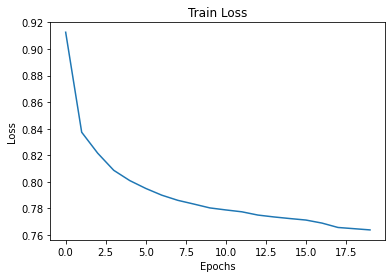

In [4]:
BATCH_SIZE = 1000
EPOCHS = 50

dataset = aenc.CreditscoringDataset("gmsc.csv")      # load and prepare Dataset to Tensor
data_loader = aenc.DataLoader(                       # create Dataloader for batching
    dataset, 
    batch_size=BATCH_SIZE,
    shuffle=True
)

shape = [dataset.x.shape[1], 35, 2, 35, dataset.x.shape[1]]  # define shape of Autoencoder
net = aenc.Autoencoder(shape)
print(net)
net.to("cpu")

train_loss = aenc.train(net, data_loader, EPOCHS)               

plt.figure()
plt.plot(train_loss)
plt.title('Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [5]:
# Use trained Autoencoder
with torch.no_grad():
    print(net.encode(torch.rand(10, 68)))

tensor([[1.9855, 3.4918],
        [2.6322, 4.3805],
        [1.6987, 2.5035],
        [2.9201, 3.8055],
        [2.7041, 4.6834],
        [2.6671, 3.8857],
        [2.0525, 2.9384],
        [1.2457, 1.8258],
        [2.6590, 3.9460],
        [2.1117, 4.1212]])


Itteration: 0) Accepted: 1815 | Denied: 4260 - New train set size: (16815, 2)
Itteration: 1) Accepted: 1796 | Denied: 4279 - New train set size: (18611, 2)
Itteration: 2) Accepted: 1809 | Denied: 4266 - New train set size: (20420, 2)
Itteration: 3) Accepted: 1821 | Denied: 4254 - New train set size: (22241, 2)
Itteration: 4) Accepted: 1820 | Denied: 4255 - New train set size: (24061, 2)
Itteration: 5) Accepted: 1819 | Denied: 4256 - New train set size: (25880, 2)
Itteration: 6) Accepted: 1822 | Denied: 4253 - New train set size: (27702, 2)
Itteration: 7) Accepted: 1822 | Denied: 4253 - New train set size: (29524, 2)
Itteration: 8) Accepted: 1811 | Denied: 4264 - New train set size: (31335, 2)
Itteration: 9) Accepted: 1822 | Denied: 4253 - New train set size: (33157, 2)
Itteration: 10) Accepted: 1822 | Denied: 4253 - New train set size: (34979, 2)
Itteration: 11) Accepted: 1821 | Denied: 4254 - New train set size: (36800, 2)
Itteration: 12) Accepted: 1822 | Denied: 4253 - New train set 

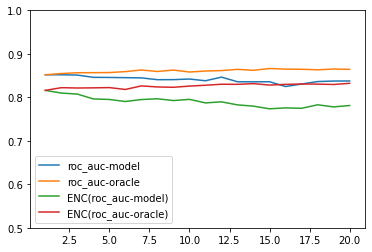

In [6]:
# Use trained Autoencoder
net.encode(torch.rand(10, 68))